In [7]:
# Project Piece 1
# Velocity dispersion
# William Lake

# import modules                                                                                                       
import numpy as np
import astropy.units as u
from ReadFile import Read
from CenterOfMass2 import CenterOfMass
import math
from matplotlib.pyplot import *
%matplotlib inline
from astropy.constants import G
G = G.to(u.kpc * u.km ** 2 / u.s ** 2 / u.Msun) # Converts the gravitational constant to our desired units

In [12]:
class VelocityDispersion2:
    '''This class aids in finding the velocity dispersions of bulge particles over radius. It will eventually
    do the same over time, held at constant radius'''
    
    def __init__(self, galaxy, galaxy2, snap):
        # This function/class takes the galaxy name and snapshot number as inputs
        
        # The following three lines create the part of the filename that describe the Snap number, and then generate the filename
        ilbl = '000' + str(snap)
        ilbl = ilbl[-3:]
        self.filename = "%s_"%(galaxy) + ilbl + '.txt'
        time, total, data = Read(self.filename) # Read the data
        self.filename2 = "%s_"%(galaxy2) + ilbl + '.txt'
        time2, total2, data2 = Read(self.filename2) # Read the data
        
        x = np.array(data['x'])
        x = np.append(x, np.array(data2['x']))
        self.x = x * u.kpc # Import the x, y, and z coordinates with correct units
        y = np.array(data['y'])
        y = np.append(y, np.array(data2['y']))
        self.y = y * u.kpc
        z = np.array(data['z'])
        z = np.append(z, np.array(data2['z']))
        self.z = z * u.kpc
        
        vx = np.array(data['vx']) # Import the vx, vy, and vz data with correct units
        vx = np.append(vx, np.array(data2['vx']))
        self.vx = vx * u.km / u.s 
        vy = np.array(data['vy'])
        vy = np.append(vy, np.array(data2['vy']))
        self.vy = vy * u.km / u.s
        vz = np.array(data['vz'])
        vz = np.append(vz, np.array(data2['vz']))
        self.vz = vz * u.km / u.s
        
        m = np.array(data['m'])
        self.m1 = np.sum(m)
        self.m2 = np.sum(data2['m'])
        m = np.append(m, np.array(data2['m']))
        self.m = m # Import the mass data
        self.data = np.append(data, data2)
        self.gname = galaxy # Stores galaxy name
        self.gname2 = galaxy2
        
    def distance(self, x1, x2, y1, y2, z1, z2):
        # This function describes the absolute distance between points (x1,y1,z1) and (x2, y2, z2)
        return np.sqrt(((x1 - x2) ** 2 + (y1 - y2) ** 2 + (z1 - z2) ** 2))
    
    def dispersion(self, vArray, VX_COM, VY_COM, VZ_COM):
        # This function finds the velocity dispersion of an array vArray of 3-D velocities (contained within a formatted data set)
        bulgeIndices = np.where(vArray['type'] == 3)
        
        corr_vArray = []
        bulgeVArray = vArray[bulgeIndices]
        
        for i in range(np.shape(bulgeVArray)[0]):
            corr_vArray.append(self.distance(bulgeVArray['vx'][i] * u.km / u.s, VX_COM, bulgeVArray['vy'][i] * u.km / u.s, VY_COM, bulgeVArray['vz'][i] * u.km / u.s, VZ_COM).value)
            
        disp = np.std(corr_vArray)
        return disp
        
    def CumDispersion(self, rArray):
        # Takes as input an array of radii
        # Returns the cumulative velocity dispersion within the stars enclosed
        COM_Object = CenterOfMass(self.filename, 2)
        COM_Object2 = CenterOfMass(self.filename2, 2)
        
        VX_COM, VY_COM, VZ_COM = COM_Object.COM_V(1.0)
        X_COM, Y_COM, Z_COM = COM_Object.COM_P(1.0) # Finds the center of mass coordinates of the galaxy
        
        VX_COM2, VY_COM2, VZ_COM2 = COM_Object2.COM_V(1.0)
        X_COM2, Y_COM2, Z_COM2 = COM_Object2.COM_P(1.0) # Finds the center of mass coordinates of the galaxy
        
        X_COM = (X_COM * self.m1 + X_COM2 * self.m2) / (self.m1 + self.m2) # Finds the center of mass coordinates for the remnant
        Y_COM = (Y_COM * self.m1 + Y_COM2 * self.m2) / (self.m1 + self.m2)
        Z_COM = (Z_COM * self.m1 + Z_COM2 * self.m2) / (self.m1 + self.m2)
        
        typeIndex = np.where(self.data['type'] == 3) # Selects bulge particles
        
        radii = self.distance(self.x, X_COM, self.y, Y_COM, self.z, Z_COM)[typeIndex]
        # Creates an array to hold distances of particles from the COM
        dispersions = np.zeros(len(rArray)) # Creates our result array
        
        for index in range(len(rArray)):
            # Loops over rArray to find enclosed dispersion
            indices = np.where(radii < rArray[index])
            dispersions[index] = self.dispersion((self.data[typeIndex])[indices], VX_COM, VY_COM, VZ_COM)
            print(rArray[index])
        
        return dispersions


30.0 kpc
27.27272727272727 kpc
24.79338842975206 kpc
22.539444027047324 kpc
20.49040366095211 kpc
18.627639691774647 kpc
16.934217901613312 kpc
15.394743546921191 kpc
13.995221406291991 kpc
12.722928551174537 kpc
11.566298682885941 kpc
10.514816984441763 kpc
9.558924531310693 kpc
8.689931392100629 kpc
7.899937629182389 kpc
7.181761481074899 kpc
6.528874073704453 kpc
5.935340067004048 kpc
5.395763697276407 kpc
4.905239724796733 kpc
4.459308840724302 kpc
4.053917127931183 kpc
3.685379207210166 kpc
3.3503447338274235 kpc
3.045767939843112 kpc
2.7688799453119195 kpc
2.5171635866471993 kpc
2.2883305333156354 kpc
2.080300484832396 kpc
1.8911822589385414 kpc
1.7192565990350375 kpc
1.5629605445773067 kpc
1.420873222343006 kpc
1.2917029294027327 kpc
1.1742753903661205 kpc
1.0675230821510187 kpc
0.9704755292281987 kpc
0.8822504811165441 kpc
0.802045891924131 kpc
0.7291326290219372 kpc
0.6628478445653974 kpc
0.6025889496049066 kpc
0.5478081360044605 kpc
0.49800739636769137 kpc
0.4527339966979012 

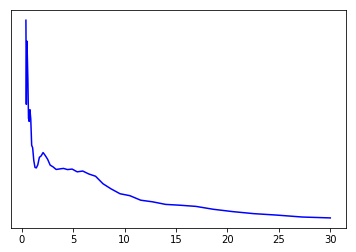

In [14]:
MWDisp = VelocityDispersion2('MW', 'M31', 800)

radiusArray = []
i = 30
while i > .4:
    radiusArray.append(i)
    i /= 1.1
radiusArray = np.array(radiusArray) * u.kpc

dispersion = MWDisp.CumDispersion(radiusArray)
print(dispersion)
semilogy(radiusArray, dispersion,'b', label = 'Merger Remnant Cumulative Bulge Dispersion')


In [ ]:
plot()